
# Table of contents
 - Import Dependencies
 - Load and Visualize data
 - Build Model
 - Train Model
 - Evaluate Model
 - Final Evaluations

## Import Dependencies

In [1]:
import numpy as np 
import pandas as pd 
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pathlib import Path
import shutil
from collections import Counter
import keras 
import tensorflow as tf
from keras.layers import *
from keras.models import *
from IPython.display import Image
from keras import backend as K

Using TensorFlow backend.


## Load and Visualize data

In [8]:
path = "Dataset/Pictures/"
subjects_folder = os.listdir(path)
#la lista dei file viene caricata in modo arbitratrio, quindi la ordino per conformarla
subjects_folder.sort()
size = len(subjects_folder)

In [9]:
print("Formato dei file: gender_glasses_eyeState_reflections_imageQuality_sensorType\n")

Formato dei file: gender_glasses_eyeState_reflections_imageQuality_sensorType



In [4]:
#Per trovare la dimensione minima di un'immagine
w = []
h = [] 

for folder in subjects_folder:
    subject_folder_path = path + folder
    subject_folder = os.listdir(subject_folder_path)
    for img in subject_folder:
        image_path = subject_folder_path + "/" + img
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        w.append(image.shape[1])
        h.append(image.shape[0])
        
min(w)
min(h)

NotADirectoryError: [Errno 20] Not a directory: 'Dataset/Pictures/.DS_Store'

In [10]:
images = []
glasses = []
genders = []
eye_state = [] 
reflections = []
image_quality = []
sensor_type = []
files_name = []

IMG_WIDTH= 52
IMG_HEIGHT = 52

for folder in subjects_folder:
    subject_folder_path = path + folder
    subject_folder = os.listdir(subject_folder_path)
    print(subject_folder_path)
    for img in subject_folder:
        image_path = subject_folder_path + "/" + img
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, dsize=(IMG_HEIGHT,IMG_WIDTH))
        image = image.reshape((image.shape[0],image.shape[1],1))
        images.append(image)
        split_name = img.split('.')
        split_var = split_name[0].split('_')
        genders.append(int(split_var[2]))
        glasses.append(int(split_var[3]))
        eye_state.append(int(split_var[4]))
        reflections.append(int(split_var[5]))
        image_quality.append(int(split_var[6]))
        sensor_type.append(int(split_var[7]))
        files_name.append(img)
                               

Dataset/Pictures/s0001
Dataset/Pictures/s0002
Dataset/Pictures/s0003
Dataset/Pictures/s0004
Dataset/Pictures/s0005
Dataset/Pictures/s0006
Dataset/Pictures/s0007
Dataset/Pictures/s0008
Dataset/Pictures/s0009
Dataset/Pictures/s0010
Dataset/Pictures/s0011
Dataset/Pictures/s0012
Dataset/Pictures/s0013
Dataset/Pictures/s0014
Dataset/Pictures/s0015
Dataset/Pictures/s0016
Dataset/Pictures/s0017
Dataset/Pictures/s0018
Dataset/Pictures/s0019
Dataset/Pictures/s0020
Dataset/Pictures/s0021
Dataset/Pictures/s0022
Dataset/Pictures/s0023
Dataset/Pictures/s0024
Dataset/Pictures/s0025
Dataset/Pictures/s0026
Dataset/Pictures/s0027
Dataset/Pictures/s0028
Dataset/Pictures/s0029
Dataset/Pictures/s0030
Dataset/Pictures/s0031
Dataset/Pictures/s0032
Dataset/Pictures/s0033
Dataset/Pictures/s0034
Dataset/Pictures/s0035
Dataset/Pictures/s0036
Dataset/Pictures/s0037


In [11]:
#shape di un'immagine
images[1].shape

(52, 52, 1)

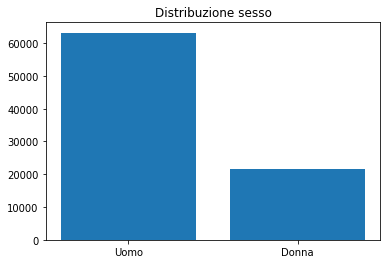

Uomini:  63173
Donne:  21725


In [12]:
#Grafico della distribuzione sesso
sesso = ['Uomo','Donna']
x_genders = list(set(genders))
y_genders = [genders.count(i) for i in x_genders]
plt.bar(sesso,y_genders)
plt.title('Distribuzione sesso')
plt.show()
print("Uomini: ",y_genders[0])
print("Donne: ",y_genders[1])

Nome file: s0001_00947_0_1_0_2_0_01.png
Genders: 0
Glasses: 1
Eye_state: 0
Reflections: 2
Image_quality: 0
Sensor_type: 1


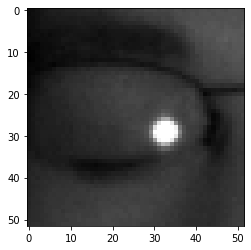

In [13]:
#funzione per lo show di un'immagine. 
def display(img):
    img = np.squeeze(img)  #squeeze remove single-dimensional entries from the shape of an array.
    plt.imshow(img)
    plt.set_cmap('gray')
    plt.show()

idx = 1
sample = images[idx]
print("Nome file:",files_name[idx])
print("Genders:",genders[idx])
print("Glasses:",glasses[idx])
print("Eye_state:",eye_state[idx])
print("Reflections:",reflections[idx])
print("Image_quality:",image_quality[idx])
print("Sensor_type:",sensor_type[idx])
display(images[idx])

In [14]:
#Creazione di un'unica lista contenente le feature associate alle immagini
features = []

for i in range(len(images)):
    
    featElement = np.array([int(genders[i]),int(glasses[i]),int(reflections[i]),int(image_quality[i]),int(sensor_type[i])])
    features.append(featElement)

features = np.asarray(features)

In [32]:
#Creazione CSV con etichette
import csv

with open('dataset_with_label.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=';', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    filewriter.writerow([ "Image_Name", "Glasses", "Genders", "Reflections","Image_quality", "Sensor_type", "Eye_state"])
 
    for i in range(len(images)):
        arr = np.array(images[i])
        flat_arr = arr.ravel()
        filewriter.writerow([files_name[i], glasses[i], genders[i], reflections[i], image_quality[i], sensor_type[i], eye_state[i]])



#Creazione CSV senza etichette
with open('dataset_without_label.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=';', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    filewriter.writerow([ "Image_Name", "Glasses", "Genders", "Reflections","Image_quality", "Sensor_type"])
 
    for i in range(len(images)):
        arr = np.array(images[i])
        flat_arr = arr.ravel()
        filewriter.writerow([files_name[i], glasses[i], genders[i], reflections[i], image_quality[i], sensor_type[i]])

In [15]:
#Normalizzazione delle immagini
if 'target' not in locals():
    target = eye_state
    images = np.array(images)
    images = images / 255

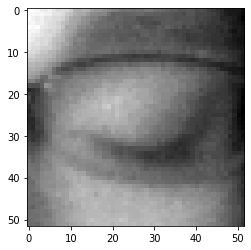

File name: s0001_01691_0_1_0_0_0_01.png
Eye_state: 0
Genders: 0
Glasses: 1
Reflections: 0
Image_quality: 0
Sensor_type: 1


In [16]:
#Altro esempio
idx=120
display(images[idx])
print("File name:",files_name[idx])
print("Eye_state:",target[idx])
print("Genders:",features[idx][0])
print("Glasses:",features[idx][1])
print("Reflections:",features[idx][2])
print("Image_quality:",features[idx][3])
print("Sensor_type:",features[idx][4])

In [17]:
#split dei dati
#oltre ai soliti primi 4 parametri, inserisco name_train e name_test per inserire i nomi dei file per poterli dividere in cartelle
images_train, images_test, feat_train, feat_test, y_train, y_test, fileName_train, fileName_test = train_test_split(images, features, target, files_name, test_size=0.2,random_state=42,shuffle=True)
print("Samples in Training:",images_train.shape[0])
print("Samples in Testing:",images_test.shape[0])


Samples in Training: 67918
Samples in Testing: 16980


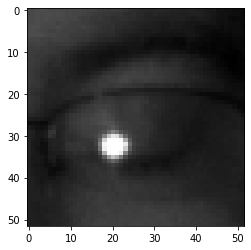

0
[0 1 2 0 1]
s0014_03025_0_1_0_2_0_01.png


In [18]:
idx=1001
display(images_train[idx])
print(y_train[idx])
print(feat_train[idx])
print(fileName_train[idx])

In [14]:
#controllo se le cartelle test e training sono già presenti
print("Cartella training?",os.path.isdir("training"))
print("Cartella test?",os.path.isdir("test"))


#controllo se i dati sono già presenti nelle cartelle (non è la prima esecuzione del codice)
firstExec = True
#DA MIGLIORARE EFFICIENZA
if((os.path.isdir("training")) and (os.path.isdir("test"))):
    trElements = os.listdir("training/")
    teElements = os.listdir("test/")
    if((Counter(fileName_train) == Counter(trElements)) and (Counter(fileName_test) == Counter(teElements))):
        firstExec = False

print("Prima esecuzione?",firstExec)

Cartella training? True
Cartella test? False
Prima esecuzione? True


In [34]:
#se è la prima esecuzione creo le cartelle e vi inserisco i file        
if(firstExec):
    #creo la cartella dove inserire le immagini di training
    Path("training").mkdir(parents=True, exist_ok=True)
    
    #copio le immagini di training
    for i in range(0,images_train.shape[0]):
        split_var = fileName_train[i].split('_')
        subject_id = (split_var[0])
        shutil.copy(path + subject_id + "/" + fileName_train[i],"training/" + fileName_train[i])
    trElements = os.listdir("training/")
    #print(set(name_train).symmetric_difference(set(trElements)))
    assert Counter(fileName_train) == Counter(trElements),set(fileName_train).symmetric_difference(set(trElements))
    
    #creo la cartella dove inserire le immagini di test
    Path("test").mkdir(parents=True, exist_ok=True)
    #copio le immagini di test
    for i in range(0,images_test.shape[0]):
        split_var = fileName_test[i].split('_')
        subject_id = (split_var[0])
        shutil.copy(path + subject_id + "/" + fileName_test[i],"test/"+fileName_test[i])
    teElements = os.listdir("test/")
    assert Counter(fileName_test) == Counter(teElements),set(fileName_test).symmetric_difference(set(teElements))
    

## Build Model

In [19]:
#Funzione per la creazione di un modello
def create_cnn_model():

    #inputs = Input(shape=(IMG_HEIGHT,IMG_WIDTH,3))
    inputs = Input(shape=(IMG_HEIGHT,IMG_WIDTH,1))
    conv1 = Conv2D(32, kernel_size=(3, 3),activation='relu')(inputs)
    conv2 = Conv2D(32, kernel_size=(3, 3),activation='relu')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(64, kernel_size=(3, 3),activation='relu')(pool1)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv3)
    #x = MaxPooling2D(pool_size=(2, 2))(conv3)
    x = Dropout(0.15)(pool2)
        
    x = Flatten()(x) 
    
    #shape degli attributi numerici
    #featureShape = Input(shape=(5,)) #Shape nel caso in cui si considerano anche gli agli attributi
    #x = keras.layers.Concatenate(axis=1)([x, featureShape]) #Concatenazione delle altre feature alle immagini
    
    #dropout = Dropout(0.15)
    model_detector = Dense(128, activation='relu')(x)
    #age_model = dropout(age_model)
    model_detector = Dense(64, activation='relu')(model_detector)
    #age_model = dropout(age_model)
    model_detector = Dense(32, activation='relu')(model_detector)
    #age_model = dropout(age_model)
    model_detector = Dense(1, activation='sigmoid')(model_detector)
   
        
    # Costruzione della CNN
    #model = Model([inputs, featureShape], model_detector) 
    model = Model(inputs, model_detector)
    model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics =['accuracy'])
   
    # Restituiamo la CNN creata
    return model        

In [20]:
#istanziamo un modello chiamando la funzione sopra definita
model = create_cnn_model()

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 52, 52, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 64)        0   

## Train Model

In [21]:
# Training del modello 
batch_size = 500
nb_epoch = 1
hist_model = model.fit(x = images_train, y = y_train, epochs = nb_epoch, batch_size = batch_size, validation_split=0.1, shuffle=True)


Train on 61126 samples, validate on 6792 samples
Epoch 1/1
61126/61126 [==============================] - 152s 2ms/step - loss: 0.3231 - accuracy: 0.8646 - val_loss: 0.1743 - val_accuracy: 0.9382


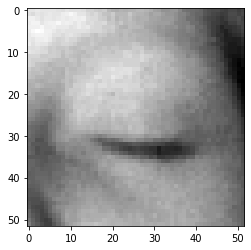


  [[0.04602134]]


In [24]:
#Infine, proviamo con una nostra immagine

idx=4
display(images_test[idx])
image = images_test[idx].reshape((-1,images_test[idx].shape[0],images_test[idx].shape[1],1))
print("")
print(" ",model.predict(image))